## Note, this needs to run in a NON_arc environment with GDAL installed, 
because ESRI and Gdal dont play nice

In [9]:
#### import modules

# make the screen bigger!
from IPython.display import display, HTML
display(HTML(data=""" <style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 85%; }
    div#maintoolbar-container { width: 99%; } </style> """))

import numpy as np
import os
import sys
import pandas as pd
import gdal

%matplotlib notebook

# this is a list of additional functions to load up, as to not clutter the script
%run ../../Std_input/COMMON/plot_and_table_functions

# Land use scenarios, no climate Figures

<IPython.core.display.Javascript object>


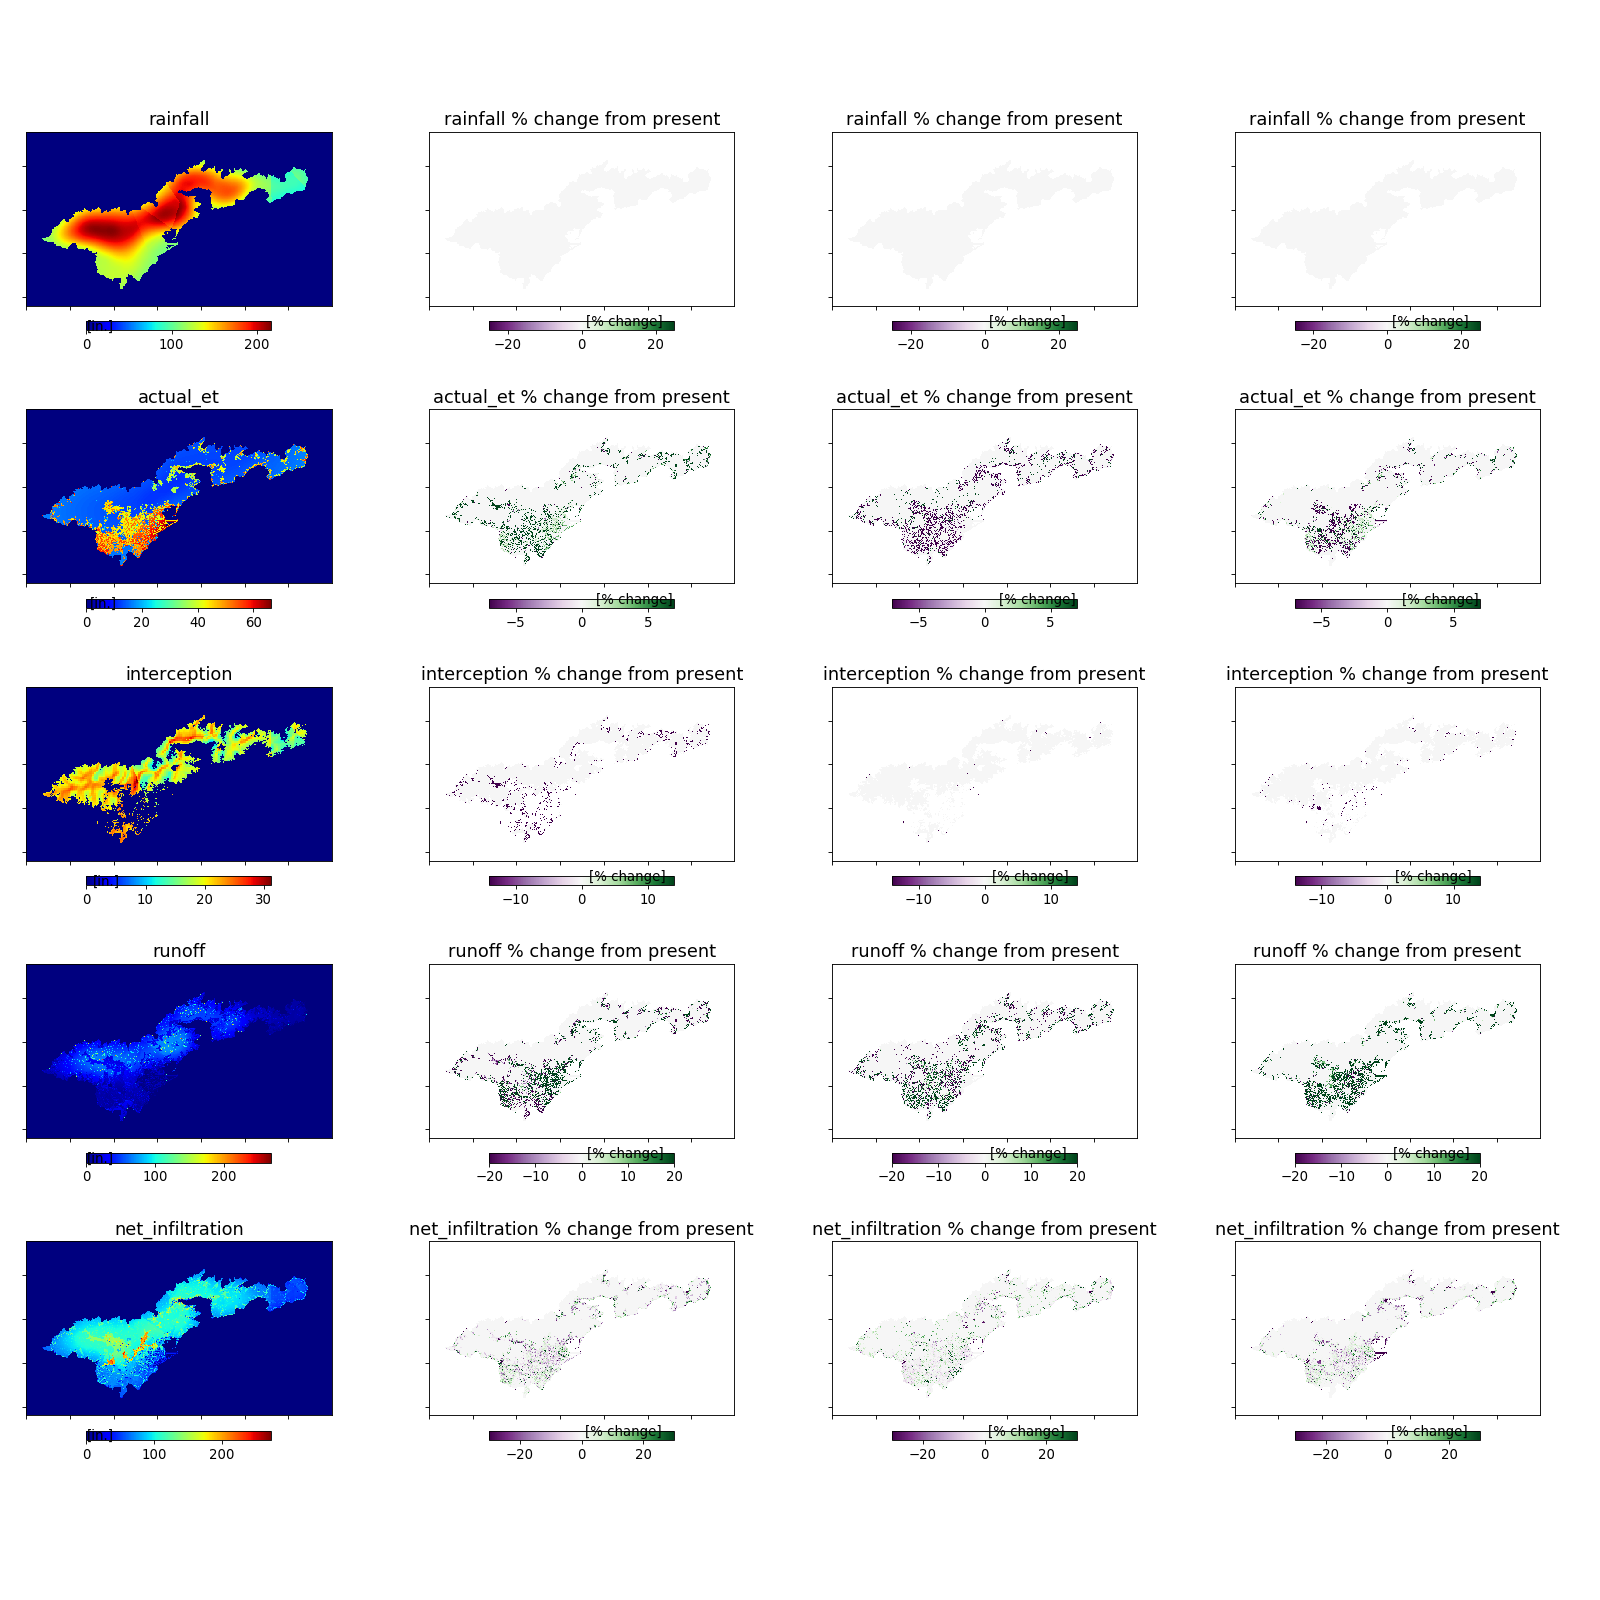


reading in ..\1_Original_run_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\2_scn1_noclimate_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\3_scn2_noclimate_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...


<ipython-input-10-02a761542ddb>:47: RuntimeWarning: invalid value encountered in true_divide
  var=(rfs_dataSCEN/rfs_data-1)*100



reading in ..\4_scn3_noclimate_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\1_Original_run_out\post_prcessed_with_MFR\actual_et_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\2_scn1_noclimate_out\post_prcessed_with_MFR\actual_et_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...


<ipython-input-10-02a761542ddb>:47: RuntimeWarning: divide by zero encountered in true_divide
  var=(rfs_dataSCEN/rfs_data-1)*100



reading in ..\3_scn2_noclimate_out\post_prcessed_with_MFR\actual_et_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\4_scn3_noclimate_out\post_prcessed_with_MFR\actual_et_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\1_Original_run_out\post_prcessed_with_MFR\interception_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\2_scn1_noclimate_out\post_prcessed_with_MFR\interception_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\3_scn2_noclimate_out\post_prcessed_with_MFR\interception_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\4_scn3_noclimate_out\post_prcessed_with_MFR\interception_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

readi

In [10]:
Desired_files = ['rainfall', 'actual_et',  'interception', 'runoff', 'net_infiltration'] # 'delta_soil_storage',  'irrigation', 

scenario_list = ["2_scn1_noclimate_out", "3_scn2_noclimate_out", "4_scn3_noclimate_out"]

maxlist = [25, 7, 14, 20, 30]

fig = plt.figure(num=None, figsize=(20, 20), dpi=100, facecolor='w', edgecolor='k')

plot_colsN = len(scenario_list)+1
plot_rowsN = len(Desired_files)

for idx, f in enumerate(Desired_files): 
    
    # Base case
    f_nam = f +"_annual.asc"
    Scenario_path = os.path.join("..", "1_Original_run_out", "post_prcessed_with_MFR", f_nam)
    
    ax1 = fig.add_subplot(plot_rowsN,plot_colsN, idx*plot_colsN + 1)

    rfs_data, rfs_gt, rfs_proj, rfs_xy = read_raster(Scenario_path)
    rfs_data[rfs_data > 300] = 0  
    var=rfs_data 
    x=rfs_xy[0]
    y=rfs_xy[1]
    minz = np.nanmin(var)
    maxz = np.nanmax(var)
    title= f ; barlabel='[in.]'

    myplot = plt.imshow( var, interpolation='nearest', cmap='jet', extent=(np.nanmin(x), np.nanmax(x), np.nanmin(y), np.nanmax(y)) )
    mybar = plt.colorbar( myplot, ax = ax1, orientation = 'horizontal', fraction = 0.03, pad=.05)
    myax = mybar.ax
    mybar.ax.tick_params(labelsize=12)
    plt.clim(minz, maxz)
    plt.title( title, fontsize=16 )
    myax.text(1.1, -1.5, barlabel,rotation=0,size=12)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    
    # iterate over scenarios
    for scenN, da_scenario in enumerate(scenario_list):
        
        Scenario_path = os.path.join("..", da_scenario, "post_prcessed_with_MFR", f_nam)
        
        ax2 = fig.add_subplot(plot_rowsN,plot_colsN, idx*plot_colsN + (scenN+2))

        rfs_dataSCEN, rfs_gtSCEN, rfs_projSCEN, rfs_xySCEN = read_raster(Scenario_path)
        var=(rfs_dataSCEN/rfs_data-1)*100
        x=rfs_xySCEN[0]
        y=rfs_xySCEN[1]
        minz = np.nanmin(var)
        maxz = np.nanmax(var)
        title= f ; barlabel='[% change]'

        myplot = plt.imshow( var, interpolation='nearest', cmap='PRGn', extent=(np.nanmin(x), np.nanmax(x), np.nanmin(y), np.nanmax(y)) )
        mybar = plt.colorbar( myplot, ax = ax2, orientation = 'horizontal', fraction = 0.03, pad= .05)
        myax = mybar.ax
        mybar.ax.tick_params(labelsize=12)
        plt.clim(-maxlist[idx], maxlist[idx])
        plt.title( title+" % change from present", fontsize=16 )
        myax.text(1.1, -1.5, barlabel,rotation=0,size=12)
        ax2.set_xticklabels([])
        ax2.set_yticklabels([])

    
plt.tight_layout(pad=2)
fig.subplots_adjust(hspace=-0.1, bottom=0.1)
plt.savefig(os.path.join("..", "Results", 'Scenario_Figs_no_climate.png'))

### Land use scenarios, Regional no climate Tables

In [11]:
# Calculate changes in scenarios numerically

# set up consolidation parametres 
regions = ["TFplain", "NWest", "Central", "East"]

TFplain_list = ["Nuuuli Pala", "Leone", "Tafuna Plain", "Fagatele - Larsen"]
NWest_list =  ["Fagasa", "Aasu", "Aoloau Sisifo", "Aoloau Sasae", "Fagamalo", "Maloata", "Fagalii", "Afao - Asili", "Poloa", "Nua - Seetaga", "Amanave"]
Central_list = ["Fagatuitui - Vaaogeoge", "Vatia", "Afono", "Pago Pago Harbor", "Laulii - Aumi", "Fagaalu", "Matuu - Faganeanea"]
East_list = ["Tula", "Onenoa", "Masefau", "Aoa", "Masausi", "Sailele", "Alao", "Fagaitua", "Auasi", "Amouli", "Alega"]

# generte summary frame of the "Base Case" scenario, need one for high res and one for low-res climate downscaled
Base_case_path = os.path.join("..", "1_Original_run_out", "post_prcessed_with_MFR", "watershed_summary_stats_volume_m3pd.csv")
data = pd.read_csv(Base_case_path, index_col=0)
TFplain = data[data["SHED_NAME"].isin(TFplain_list)].sum(axis=0).to_frame().transpose()
NWest = data[data["SHED_NAME"].isin(NWest_list)].sum(axis=0).to_frame().transpose()
Central = data[data["SHED_NAME"].isin(Central_list)].sum(axis=0).to_frame().transpose()
East = data[data["SHED_NAME"].isin(East_list)].sum(axis=0).to_frame().transpose()
TFplain['SHED_NAME'] = "TFplain"
NWest['SHED_NAME'] = "NWest"
Central['SHED_NAME'] = "Central"
East['SHED_NAME'] = "East"

Base_Case_frame = pd.concat([TFplain, NWest, Central, East])


#Loop over each scenario to geenerate summary frames 
Summary_dic = {}                 # to be sored in dictionary
for  i in scenario_list:
    Scenario_path = os.path.join("..", i, "post_prcessed_with_MFR", "watershed_summary_stats_volume_m3pd.csv")
    data = pd.read_csv(Scenario_path, index_col=0)  # read in each scenario file from model run
    # use pandas magic to summarize them
    TFplain = data[data["SHED_NAME"].isin(TFplain_list)].sum(axis=0).to_frame().transpose()
    NWest = data[data["SHED_NAME"].isin(NWest_list)].sum(axis=0).to_frame().transpose()
    Central = data[data["SHED_NAME"].isin(Central_list)].sum(axis=0).to_frame().transpose()
    East = data[data["SHED_NAME"].isin(East_list)].sum(axis=0).to_frame().transpose()
    TFplain['SHED_NAME'] = "TFplain"
    NWest['SHED_NAME'] = "NWest"
    Central['SHED_NAME'] = "Central"
    East['SHED_NAME'] = "East"
    
    Reg_sum_frame = pd.concat([TFplain, NWest, Central, East])
    
    Summary_dic[i] = Reg_sum_frame   # this contains data frames of regional summaries for each scenaro
    
    
# Calculate the % difference betweeen base cases and each scenario.
base_frame = Base_Case_frame.set_index("SHED_NAME")
merge_frame = base_frame.transpose().copy()             # create a dataframe to join things onto

for i in Summary_dic.keys():                            # for each scenario basically get the scenrio/base case values
    comp_frame = Summary_dic[i].set_index("SHED_NAME")
    compcomp = (round(comp_frame/base_frame)).transpose()
    compcomp = compcomp.rename(columns={"TFplain":"TFplain_S_{}".format(i.split("_")[0]),
                                       "NWest":"NWest_S_{}".format(i.split("_")[0]),
                                       "Central":"Central_S_{}".format(i.split("_")[0]),
                                       "East":"East_S_{}".format(i.split("_")[0]),})
    
    merge_frame =  merge_frame.join(compcomp, how="inner")   # merge them to gether for inspection, and next step
    merge_frame.to_csv(os.path.join("..", "Results", "Scenario_Table_Regional_no_climate.csv"))
    
### PLOT THEM WITH BAR GRAPH

### Land use scenarios, Island no climate Tables

In [12]:
# Whole island summary

# generte summary frame of the "Base Case" scenario, need one for high res and one for low-res climate downscaled
Base_case_path = os.path.join("..", "1_Original_run_out", "post_prcessed_with_MFR", "watershed_summary_stats_volume_m3pd.csv")
Bdata = pd.read_csv(Base_case_path, index_col=0)
base_summed = Bdata.sum(axis=0)# .to_frame().transpose()    # sum all the columns 
base_summed['SHED_NAME'] = "Base"
   
#Loop over each scenario to geenerate summary frames 

Comp_frame_1 = base_summed.copy()
for  i in scenario_list:
    Scenario_path = os.path.join("..", i, "post_prcessed_with_MFR", "watershed_summary_stats_volume_m3pd.csv")
    data = pd.read_csv(Scenario_path, index_col=0)  # read in each scenario file from model run
    Scen_summed = data.sum(axis=0)
    Scen_summed['SHED_NAME'] = i
    
    Comp_frame_1 = pd.concat([Comp_frame_1, Scen_summed], axis=1)
    Comp_frame_1.columns = Comp_frame_1.loc['SHED_NAME']
    
Comp_frame_1 =  Comp_frame_1.drop('SHED_NAME', axis=0)
    
Comp_frame_island = Comp_frame_1.copy()
for i in Comp_frame_1.columns[1:]: 
    Comp_frame_1["PctCng_{}".format(i)] = Comp_frame_1[i]/Comp_frame_1["Base"]
    Comp_frame_1.drop(i, axis=1, inplace=True)
    
Comp_frame_1.to_csv(os.path.join("..", "Results", "Scenario_Table_Island_no_climate.csv"))

# Future Climate Scenarios Figures

In [13]:
Desired_files = ['rainfall', 'actual_et',  'interception', 'runoff', 'net_infiltration'] # 'delta_soil_storage',  'irrigation', 

scenario_list2 = [ "6_FutureClimate_RCP45_out", "7_FutureClimate_RCP85_out", "8_Future_Present_Scn1_out", 
                 "9_Future_Present_Scn2_out", '10_Future_Present_Scn3_out', '11_Future_RCP4.5_Scn1_out',
                  '12_Future_RCP4.5_Scn2_out', '13_Future_RCP4.5_Scn3_out', '14_Future_RCP8.5_Scn1_out',
                  '15_Future_RCP8.5_Scn2_out', '16_Future_RCP8.5_Scn3_out']

maxlist = [25, 7, 14, 20, 30]


fig = plt.figure(num=None, figsize=(60, 20), dpi=300, facecolor='w', edgecolor='k')

plot_colsN = len(scenario_list2)+1
plot_rowsN = len(Desired_files)

for idx, f in enumerate(Desired_files): 
    
    # Base case
    f_nam = f +"_annual.asc"
    Scenario_path = os.path.join("..", "5_FutureClimate_BASE_out", "post_prcessed_with_MFR", f_nam)
    
    ax1 = fig.add_subplot(plot_rowsN,plot_colsN, idx*plot_colsN + 1)

    rfs_data, rfs_gt, rfs_proj, rfs_xy = read_raster(Scenario_path)
    rfs_data[rfs_data > 300] = 0  
    var=rfs_data 
    x=rfs_xy[0]
    y=rfs_xy[1]
    minz = np.nanmin(var)
    maxz = np.nanmax(var)
    title= f ; barlabel='[in.]'

    myplot = plt.imshow( var, interpolation='nearest', cmap='jet', extent=(np.nanmin(x), np.nanmax(x), np.nanmin(y), np.nanmax(y)) )
    mybar = plt.colorbar( myplot, ax = ax1, orientation = 'horizontal', fraction = 0.03, pad=.05)
    myax = mybar.ax
    mybar.ax.tick_params(labelsize=12)
    plt.clim(minz, maxz)
    plt.title( title, fontsize=16 )
    myax.text(1.1, -1.5, barlabel,rotation=0,size=12)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    
    # iterate over scenarios
    for scenN, da_scenario in enumerate(scenario_list2):
        
        Scenario_path = os.path.join("..", da_scenario, "post_prcessed_with_MFR", f_nam)
        
        ax2 = fig.add_subplot(plot_rowsN,plot_colsN, idx*plot_colsN + (scenN+2))

        rfs_dataSCEN, rfs_gtSCEN, rfs_projSCEN, rfs_xySCEN = read_raster(Scenario_path)
        var=(rfs_dataSCEN/rfs_data-1)*100
        x=rfs_xySCEN[0]
        y=rfs_xySCEN[1]
        minz = np.nanmin(var)
        maxz = np.nanmax(var)
        title= f ; barlabel='[% change]'

        myplot = plt.imshow( var, interpolation='nearest', cmap='PRGn', extent=(np.nanmin(x), np.nanmax(x), np.nanmin(y), np.nanmax(y)) )
        mybar = plt.colorbar( myplot, ax = ax2, orientation = 'horizontal', fraction = 0.03, pad= .05)
        myax = mybar.ax
        mybar.ax.tick_params(labelsize=12)
        plt.clim(-maxlist[idx], maxlist[idx])
        plt.title( title+" % change from present", fontsize=16 )
        myax.text(1.1, -1.5, barlabel,rotation=0,size=12)
        ax2.set_xticklabels([])
        ax2.set_yticklabels([])

    
plt.tight_layout(pad=2)
fig.subplots_adjust(hspace=-0.1, bottom=0.1)
plt.savefig(os.path.join("..", "Results", 'Scenario_Figs_FutureClimate.png'))


<IPython.core.display.Javascript object>


reading in ..\5_FutureClimate_BASE_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\6_FutureClimate_RCP45_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\7_FutureClimate_RCP85_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...


<ipython-input-13-d0bbd27fc597>:51: RuntimeWarning: invalid value encountered in true_divide
  var=(rfs_dataSCEN/rfs_data-1)*100



reading in ..\8_Future_Present_Scn1_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\9_Future_Present_Scn2_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\10_Future_Present_Scn3_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\11_Future_RCP4.5_Scn1_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\12_Future_RCP4.5_Scn2_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\13_Future_RCP4.5_Scn3_out\post_prcessed_with_MFR\rainfall_annual.asc into numpy array...
creating a grid of xy coordinates in the original proje

<ipython-input-13-d0bbd27fc597>:51: RuntimeWarning: divide by zero encountered in true_divide
  var=(rfs_dataSCEN/rfs_data-1)*100




reading in ..\10_Future_Present_Scn3_out\post_prcessed_with_MFR\actual_et_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\11_Future_RCP4.5_Scn1_out\post_prcessed_with_MFR\actual_et_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\12_Future_RCP4.5_Scn2_out\post_prcessed_with_MFR\actual_et_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\13_Future_RCP4.5_Scn3_out\post_prcessed_with_MFR\actual_et_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\14_Future_RCP8.5_Scn1_out\post_prcessed_with_MFR\actual_et_annual.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ..\15_Future_RCP8.5_Scn2_out\post_prcessed_with_MFR\actual_et_annual.asc into numpy array...
creating a grid of xy coordinates in the origina

##  Future Climate Scenarios Tables

In [16]:
# Calculate changes in scenarios numerically

# set up consolidation parametres 
regions = ["TFplain", "NWest", "Central", "East"]

TFplain_list = ["Nuuuli Pala", "Leone", "Tafuna Plain", "Fagatele - Larsen"]
NWest_list =  ["Fagasa", "Aasu", "Aoloau Sisifo", "Aoloau Sasae", "Fagamalo", "Maloata", "Fagalii", "Afao - Asili", "Poloa", "Nua - Seetaga", "Amanave"]
Central_list = ["Fagatuitui - Vaaogeoge", "Vatia", "Afono", "Pago Pago Harbor", "Laulii - Aumi", "Fagaalu", "Matuu - Faganeanea"]
East_list = ["Tula", "Onenoa", "Masefau", "Aoa", "Masausi", "Sailele", "Alao", "Fagaitua", "Auasi", "Amouli", "Alega"]



# generte summary frame of the "Base Case" scenario, need one for high res and one for low-res climate downscaled
Base_case_path = os.path.join("..", "5_FutureClimate_BASE_out", "post_prcessed_with_MFR", "watershed_summary_stats_volume_m3pd.csv")
data = pd.read_csv(Base_case_path, index_col=0)
TFplain = data[data["SHED_NAME"].isin(TFplain_list)].sum(axis=0).to_frame().transpose()
NWest = data[data["SHED_NAME"].isin(NWest_list)].sum(axis=0).to_frame().transpose()
Central = data[data["SHED_NAME"].isin(Central_list)].sum(axis=0).to_frame().transpose()
East = data[data["SHED_NAME"].isin(East_list)].sum(axis=0).to_frame().transpose()
TFplain['SHED_NAME'] = "TFplain"
NWest['SHED_NAME'] = "NWest"
Central['SHED_NAME'] = "Central"
East['SHED_NAME'] = "East"

Base_Case_frame = pd.concat([TFplain, NWest, Central, East])


#Loop over each scenario to geenerate summary frames 
Summary_dic = {}                 # to be sored in dictionary
for  i in scenario_list2:
    Scenario_path = os.path.join("..", i, "post_prcessed_with_MFR", "watershed_summary_stats_volume_m3pd.csv")
    data = pd.read_csv(Scenario_path, index_col=0)  # read in each scenario file from model run
    # use pandas magic to summarize them
    TFplain = data[data["SHED_NAME"].isin(TFplain_list)].sum(axis=0).to_frame().transpose()
    NWest = data[data["SHED_NAME"].isin(NWest_list)].sum(axis=0).to_frame().transpose()
    Central = data[data["SHED_NAME"].isin(Central_list)].sum(axis=0).to_frame().transpose()
    East = data[data["SHED_NAME"].isin(East_list)].sum(axis=0).to_frame().transpose()
    TFplain['SHED_NAME'] = "TFplain"
    NWest['SHED_NAME'] = "NWest"
    Central['SHED_NAME'] = "Central"
    East['SHED_NAME'] = "East"
    
    Reg_sum_frame = pd.concat([TFplain, NWest, Central, East])
    
    Summary_dic[i] = Reg_sum_frame   # this contains data frames of regional summaries for each scenaro
    
    
# Calculate the % difference betweeen base cases and each scenario.
base_frame = Base_Case_frame.set_index("SHED_NAME")
merge_frame = base_frame.transpose().copy()             # create a dataframe to join things onto

for i in Summary_dic.keys():                            # for each scenario basically get the scenrio/base case values
    comp_frame = Summary_dic[i].set_index("SHED_NAME")
    compcomp = (round(comp_frame/base_frame)).transpose()
    compcomp = compcomp.rename(columns={"TFplain":"TFplain_S_{}".format(i.split("_")[0]),
                                       "NWest":"NWest_S_{}".format(i.split("_")[0]),
                                       "Central":"Central_S_{}".format(i.split("_")[0]),
                                       "East":"East_S_{}".format(i.split("_")[0]),})
    
    merge_frame =  merge_frame.join(compcomp, how="inner")   # merge them to gether for inspection, and next step
    merge_frame.to_csv(os.path.join("..", "Results", "Scenario_Table_Regional_FutureClimate.csv"))
    
### PLOT THEM WITH BAR GRAPH

In [17]:
# Whole island summary with climate

# generte summary frame of the "Base Case" scenario, need one for high res and one for low-res climate downscaled
Base_case_path = os.path.join("..", "5_FutureClimate_BASE_out", "post_prcessed_with_MFR", "watershed_summary_stats_volume_m3pd.csv")
Bdata = pd.read_csv(Base_case_path, index_col=0)
base_summed = Bdata.sum(axis=0)# .to_frame().transpose()    # sum all the columns 
base_summed['SHED_NAME'] = "Base"
   
#Loop over each scenario to geenerate summary frames 

Comp_frame_1 = base_summed.copy()
for  i in scenario_list2:
    Scenario_path = os.path.join("..", i, "post_prcessed_with_MFR", "watershed_summary_stats_volume_m3pd.csv")
    data = pd.read_csv(Scenario_path, index_col=0)  # read in each scenario file from model run
    Scen_summed = data.sum(axis=0)
    Scen_summed['SHED_NAME'] = i
    
    Comp_frame_1 = pd.concat([Comp_frame_1, Scen_summed], axis=1)
    Comp_frame_1.columns = Comp_frame_1.loc['SHED_NAME']
    
Comp_frame_1 =  Comp_frame_1.drop('SHED_NAME', axis=0)
    
Comp_frame_island = Comp_frame_1.copy()
for i in Comp_frame_1.columns[1:]: 
    Comp_frame_1["PctCng_{}".format(i)] = Comp_frame_1[i]/Comp_frame_1["Base"]
    Comp_frame_1.drop(i, axis=1, inplace=True)
    
Comp_frame_1.to_csv(os.path.join("..", "Results", "Scenario_Table_Island_FutureClimate.csv"))